In [1]:
library(statnet)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.0.1"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.1"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el_dist = read.csv("../data/features/dist.csv")

In [5]:
dist_net = network(el_dist, directed = TRUE, matrix.type = "edgelist", ignore.eval = FALSE, names.eval = "dist")

In [6]:
set.edge.value(dist_net, "dist", el_dist$dist)

In [11]:
el = read.csv("../data/edgelist_2011.csv")

In [12]:
nl = read.csv("../data/nodelist_2011.csv")

In [13]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)

In [14]:
nl$log_area <- log(nl$area)

In [15]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')

In [16]:
set.edge.value(net, "trade", el$weight)

In [17]:
net

 Network attributes:
  vertices = 195 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 4014 
    missing edges= 0 
    non-missing edges= 4014 

 Vertex attribute names: 
    area colonizer continent country_iso3 gdp_growth gdp_us_dollar inflation_rate landlocked langoff_1 log_area vertex.names 

 Edge attribute names not shown 

In [18]:
model = ergm(
                        net ~
                        edges +
                        mutual +
                        nodeocov("gdp_us_dollar") +
                        absdiff("gdp_us_dollar") +
                        nodeocov("inflation_rate") +
                        absdiff("inflation_rate") +
                        nodeocov("gdp_growth") +
                        absdiff("gdp_growth") +
                        nodematch("colonizer") +
                        nodematch("continent") +
                        nodematch("landlocked") +
                        nodematch("langoff_1") +
                        edgecov(dist_net, "dist")
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 0.513357164522829.

The log-likelihood improved by 2.139.

Iteration 2 of at most 20:

Optimizing with step length 0.837731316015312.

The log-likelihood improved by 2.472.

Iteration 3 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.5568.

Step length converged once. Increasing MCMC sample size.

Iteration 4 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.2182.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagno

In [19]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodeocov("gdp_us_dollar") + 
    absdiff("gdp_us_dollar") + nodeocov("inflation_rate") + absdiff("inflation_rate") + 
    nodeocov("gdp_growth") + absdiff("gdp_growth") + nodematch("colonizer") + 
    nodematch("continent") + nodematch("landlocked") + nodematch("langoff_1") + 
    edgecov(dist_net, "dist"))

Iterations:  4 out of 20 

Monte Carlo MLE Results:
                          Estimate Std. Error MCMC %  z value Pr(>|z|)    
edges                   -6.879e+00  1.276e-02     99 -539.101   <1e-04 ***
mutual                   4.636e-01  3.505e-03     98  132.252   <1e-04 ***
nodeocov.gdp_us_dollar   1.849e-01  1.981e-03      3   93.321   <1e-04 ***
absdiff.gdp_us_dollar    7.454e-02  7.814e-03      0    9.538   <1e-04 ***
nodeocov.inflation_rate  1.479e-04  3.848e-03      0    0.038   0.9693    
absdiff.inflation_rate  -1.096e-03  3.579e-03      0   -0.306   0.7593    
nodeocov.gdp_growth      6.551e-03  3.444e-03      0    1.902   0.057

In [20]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [21]:
gof


Goodness-of-fit for model statistics 

                                obs         min        mean         max
edges                       4013.00     3823.00     4021.10     4141.00
mutual                       312.00      255.00      313.59      385.00
nodeocov.gdp_us_dollar    100547.08    95874.25   100775.71   104158.43
absdiff.gdp_us_dollar      12872.49    12234.16    12889.05    13368.51
nodeocov.inflation_rate    24097.75    22946.33    24198.73    25780.52
absdiff.inflation_rate     19963.72    18734.73    20083.73    21403.49
nodeocov.gdp_growth        15798.95    14442.30    15843.05    16692.88
absdiff.gdp_growth         18520.12    17257.40    18542.16    19823.92
nodematch.colonizer         1548.00     1439.00     1550.98     1631.00
nodematch.continent          593.00      536.00      594.75      649.00
nodematch.landlocked        2627.00     2521.00     2633.36     2723.00
nodematch.langoff_1          342.00      293.00      342.17      373.00
edgecov.dist            

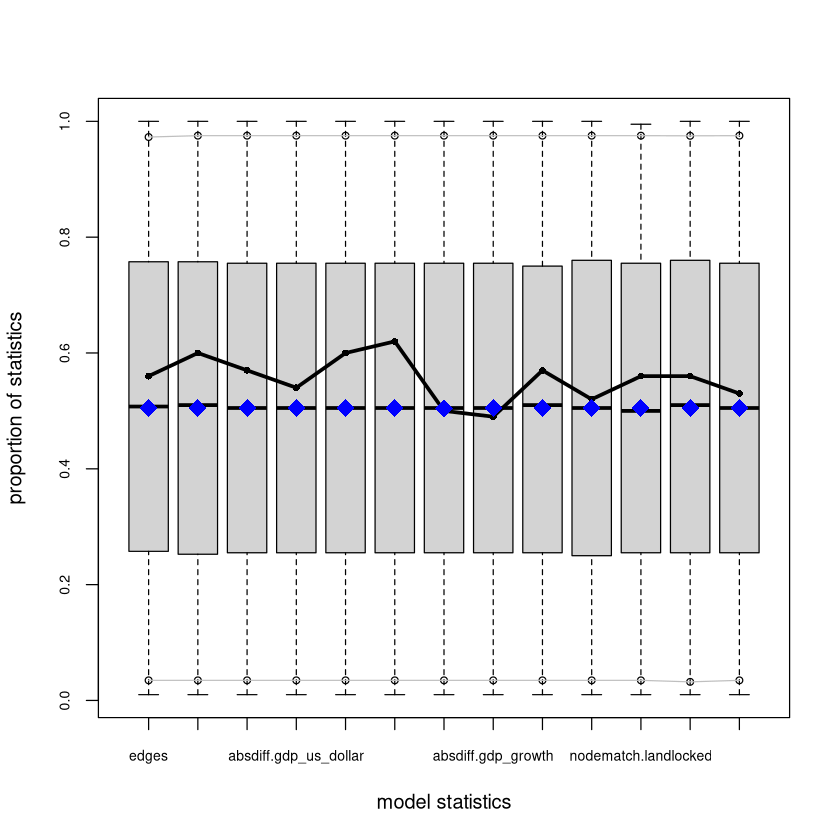

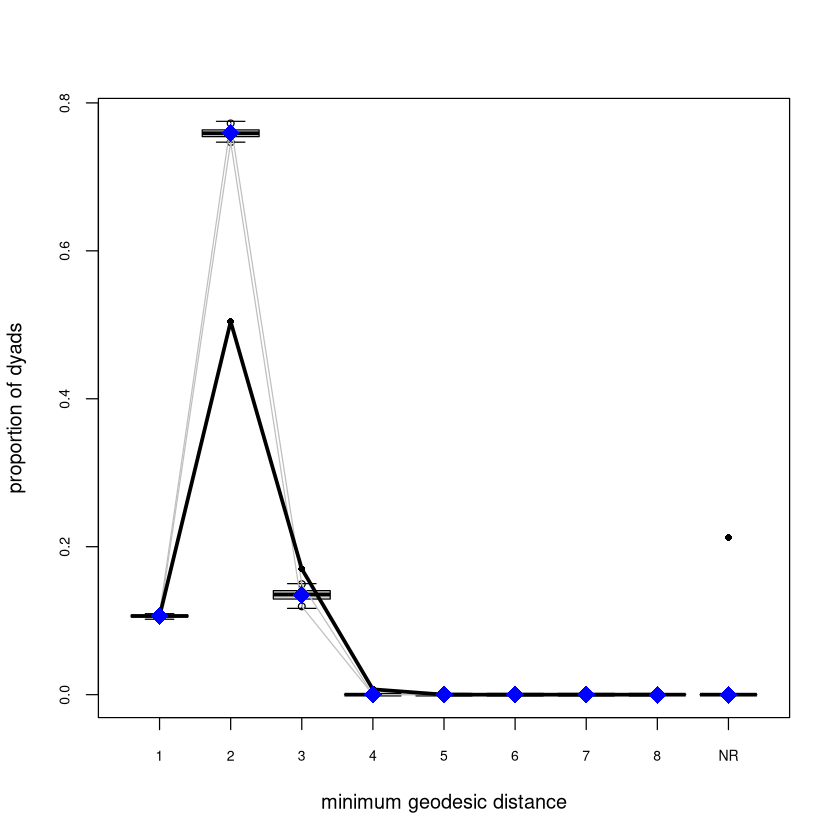

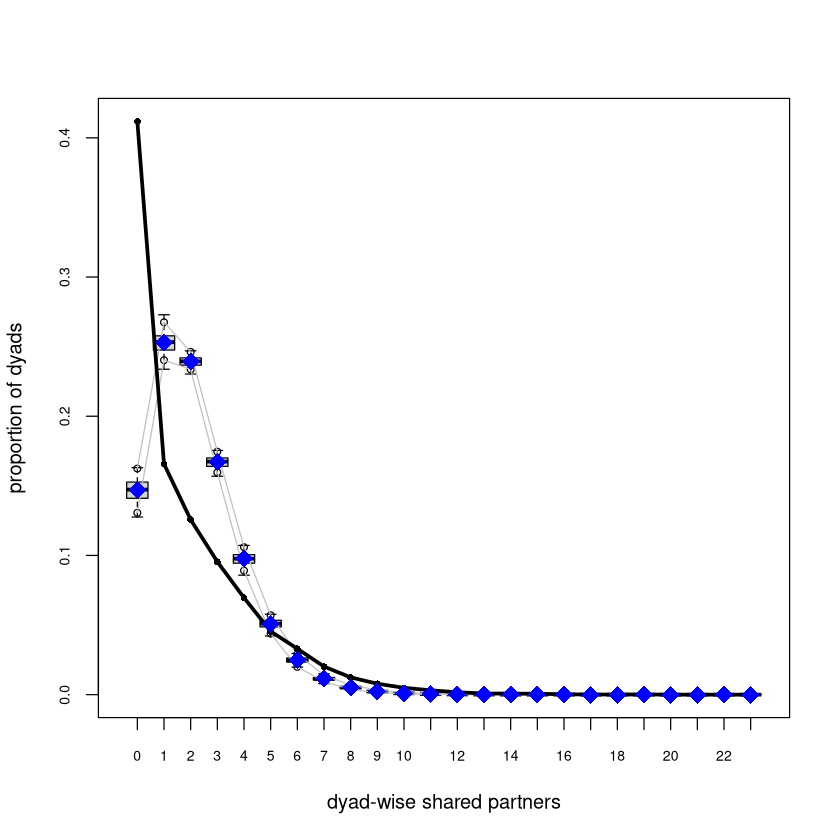

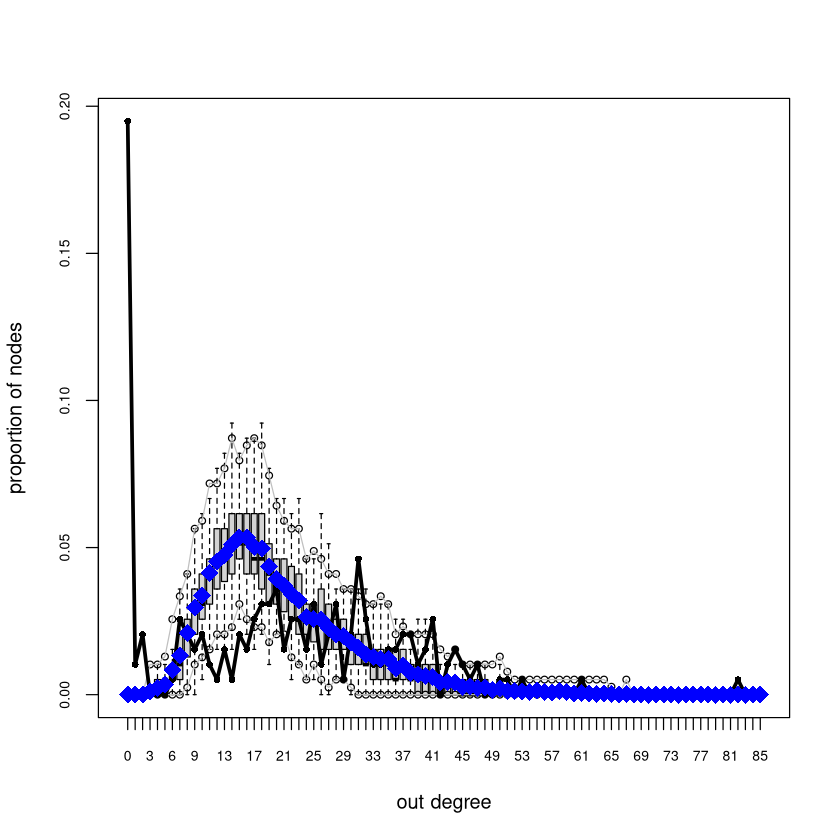

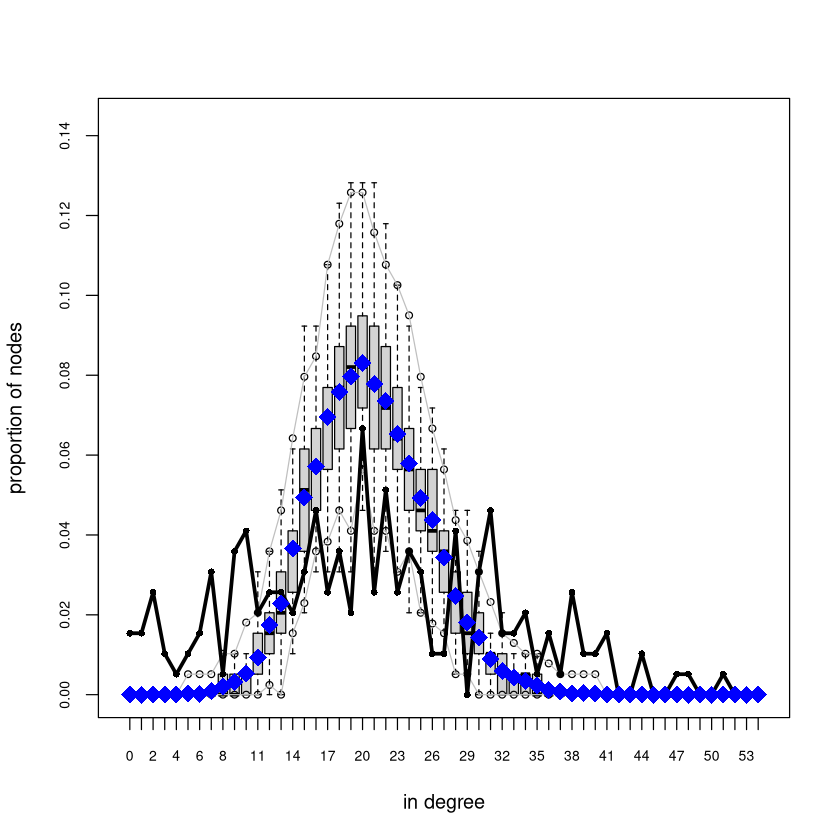

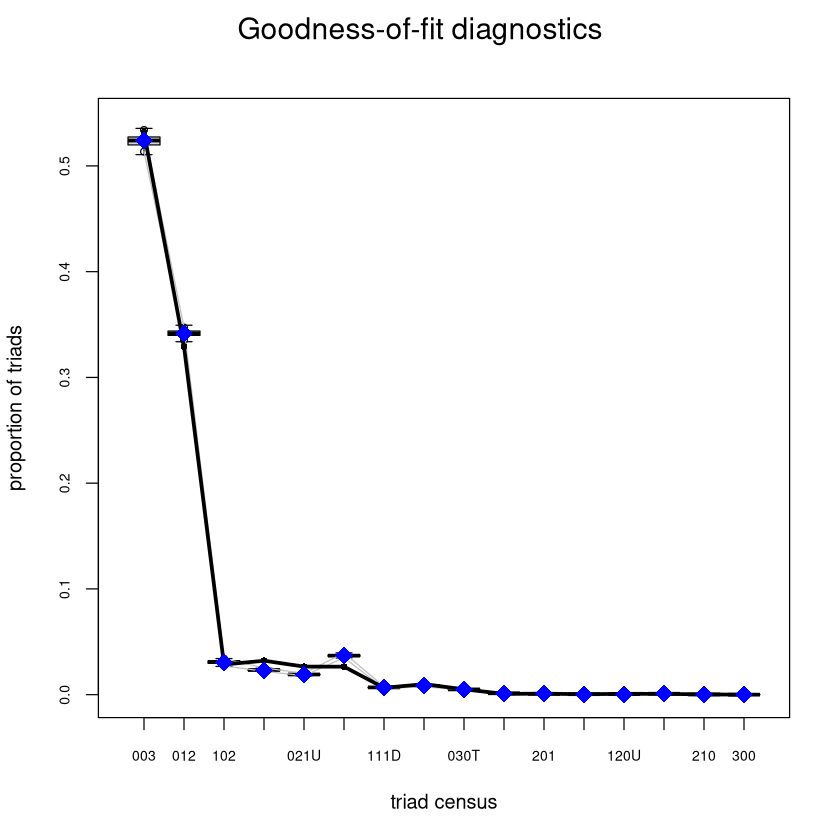

In [22]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                              Mean        SD  Naive SE Time-series SE
edges                   -1.232e+01     61.73    0.9645      4.228e+00
mutual                  -7.012e+00     16.93    0.2645      9.784e-01
nodeocov.gdp_us_dollar  -3.136e+02   1548.07   24.1885      1.090e+02
absdiff.gdp_us_dollar   -4.516e+01    222.74    3.4802      1.594e+01
nodeocov.inflation_rate -7.958e+01    481.82    7.5285      3.040e+01
absdiff.inflation_rate  -1.242e+02    457.01    7.1407      2.776e+01
nodeocov.gdp_growth     -7.710e+01    383.20    5.9875      2.435e+01
absdiff.gdp_growth      -2.183e+00    460.95    7.2024      2.947e+01
nodematch.colonizer     -1.352e+00     38.05    0.5945      2.634e+00
nodematch.continent      1.565e+00     23.13    0.3613      1.392e+00

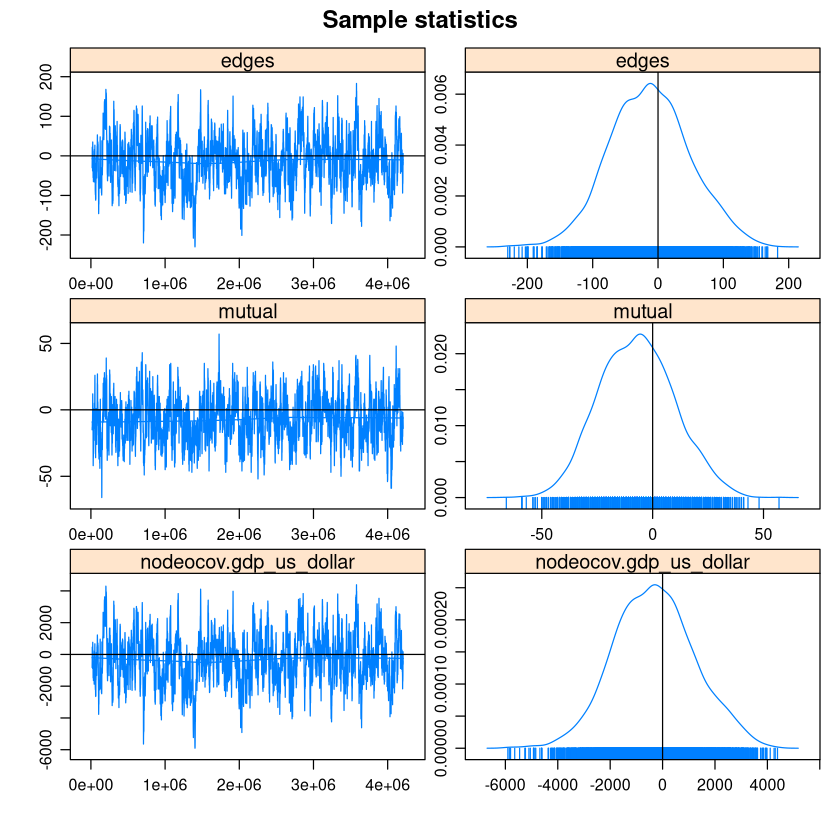

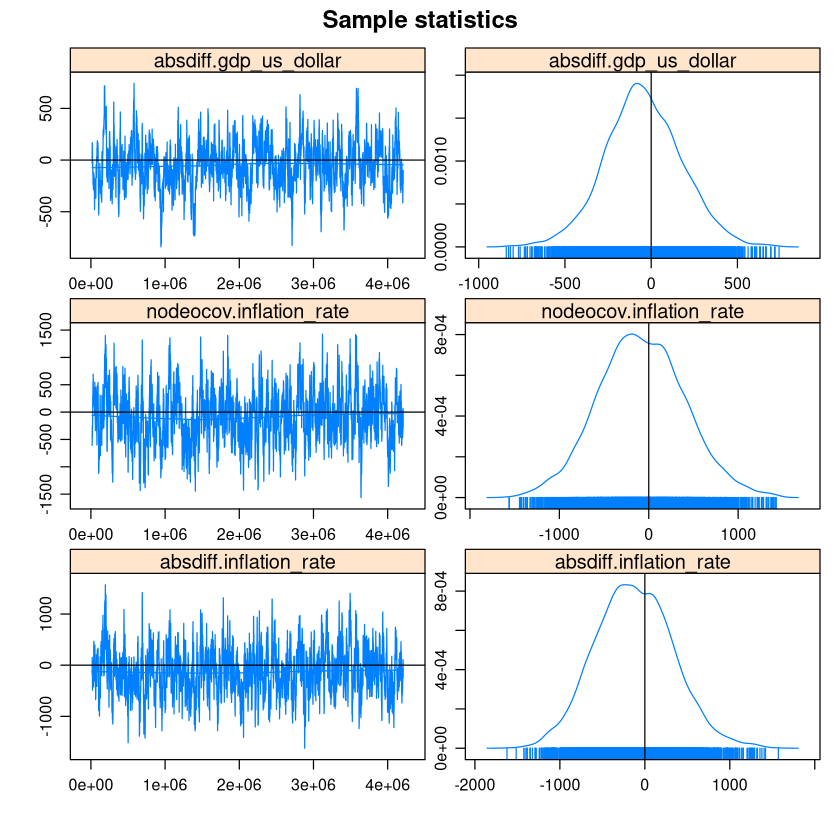

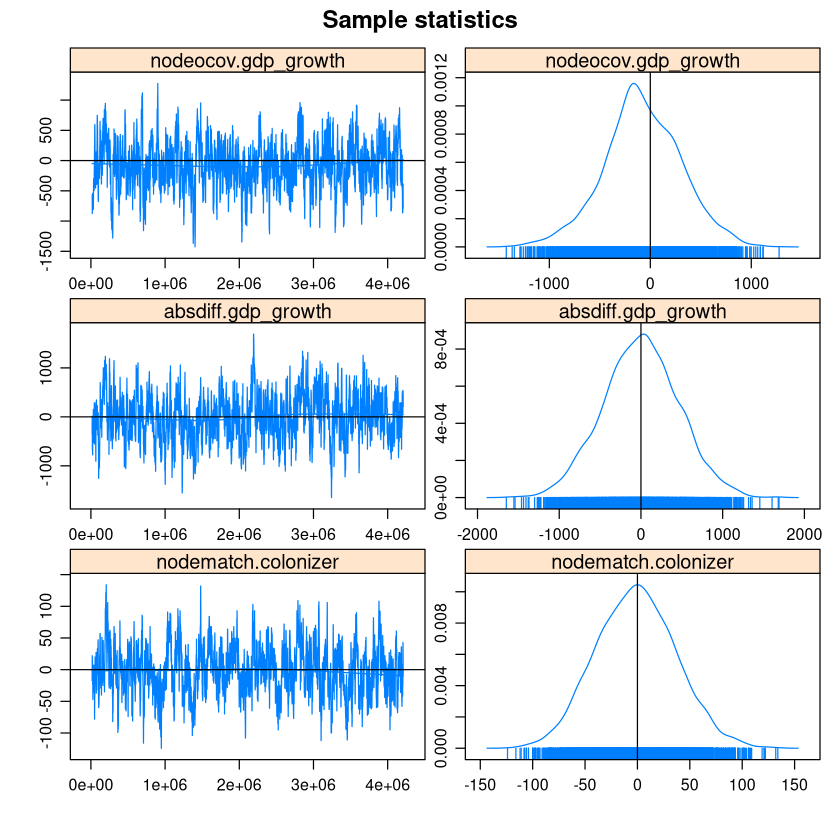

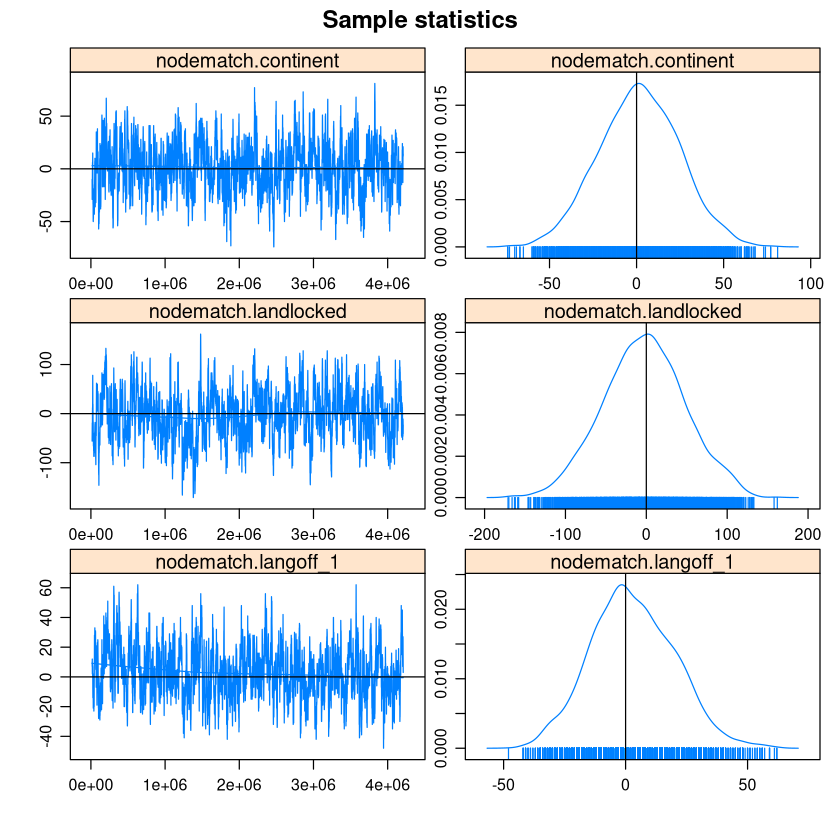


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


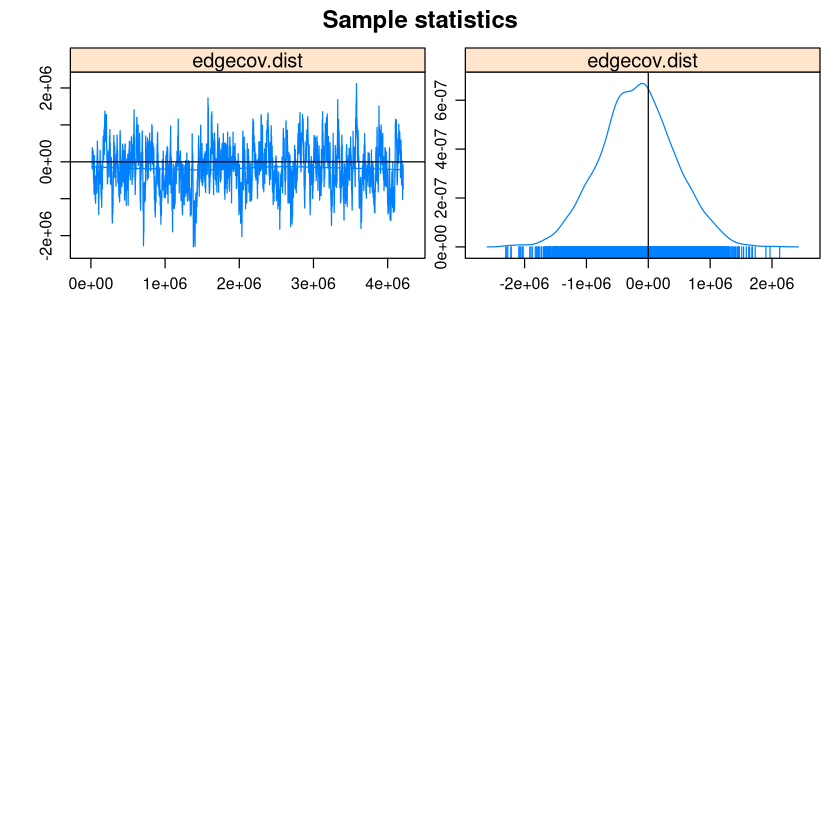

In [23]:
mcmc.diagnostics(model)